In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import pandas as pd

In [5]:
df_origin = pd.read_excel('../data/online_retail.xlsx')

In [8]:
df_origin.shape

(541909, 8)

In [9]:
df_origin.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
df_origin['StockCode'].nunique()

4070

In [13]:
df_origin['CustomerID'].nunique()

4372

In [14]:
df_origin['CustomerID'].isnull().sum()

135080

In [15]:
df_origin.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [11]:
df_origin.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [23]:
# UnitPrice が < 0 となるレコードが 2件
# Description をみて、これらのレコードは除外してよさそうにも思える。
df_origin[df_origin['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [30]:
# Country のユニーク数
df_origin['Country'].nunique()

38

In [34]:
df_origin.groupby('Country').size()

Country
Australia                 1259
Austria                    401
Bahrain                     19
Belgium                   2069
Brazil                      32
Canada                     151
Channel Islands            758
Cyprus                     622
Czech Republic              30
Denmark                    389
EIRE                      8196
European Community          61
Finland                    695
France                    8557
Germany                   9495
Greece                     146
Hong Kong                  288
Iceland                    182
Israel                     297
Italy                      803
Japan                      358
Lebanon                     45
Lithuania                   35
Malta                      127
Netherlands               2371
Norway                    1086
Poland                     341
Portugal                  1519
RSA                         58
Saudi Arabia                10
Singapore                  229
Spain                     2533


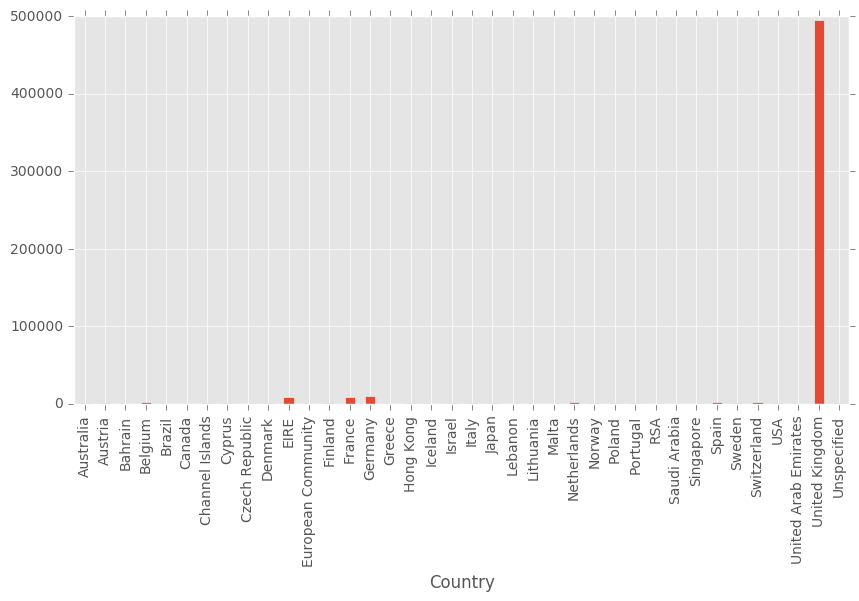

In [40]:
# レコード数の多い Country は？
# NOTE: 
# 圧倒的に UK のレコード数が多い。
# キャンセルも多いのか？
figsize = (10, 5)
df_origin.groupby('Country').size().plot(kind='bar', figsize=figsize)
plt.show()

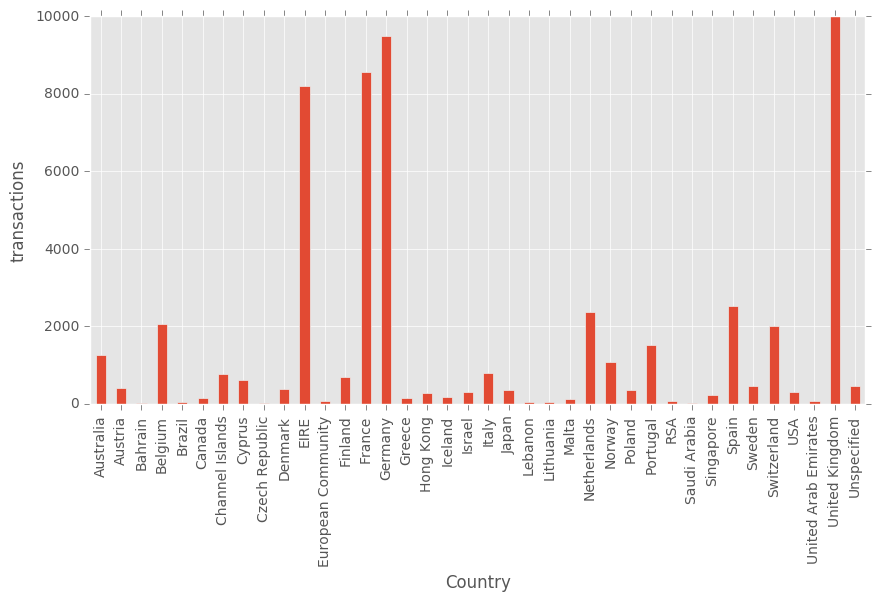

In [6]:
# UK 以外の Country ではどの Country のトランザクションが多いのか？
# NOTE: 
# UK 以外の Country はトランザクション < 10000

# Country 軸でみたときの改善余地についての仮説は？
# トランザクションは少ないが 1トランザクションの金額が大きい Country にアプローチしてトランザクション数を伸ばす？

figsize = (10, 5)
ymax = 10000
df_origin.groupby('Country').size().plot(kind='bar', figsize=figsize)
plt.ylim(0, ymax)
plt.ylabel('transactions')
plt.show()